# Transducer Grid Pressure Distribution Simulation

## Far-field Piston Source Model Implementation

In [ ]:
import numpy as np
from scipy.special import j1  # Import Bessel function

# Constants
v_sound = 343  # Speed of sound (m/s)

omega = 2 * np.pi * 40000  # Ultrasound frequency of 40 kHz
rho_0 = 1.2  # Density of air (kg/m^3)
a = 0.005  # Transducer radius of 5 mm
U_0 = 1  # Velocity amplitude (arb.u.)

k = omega / v_sound  # Wavenumber
alpha = 0  # Phase shift (rad)

# Implementation of far-field piston source model; returns complex pressure
def p(r: float, theta: float, t: float) -> complex:
  prefactor = (1j * omega * rho_0 * a**2 * U_0) / (2 * r)
  bessel_term = 1 if np.sin(theta) < 1e-8 else 2 * j1(k * a * np.sin(theta)) / (k * a * np.sin(theta))

  return prefactor * np.exp(1j * (omega * t - k * r)) * bessel_term

# Create a version of p() that works on linspaces
def p_grid(r: np.ndarray, theta: np.ndarray, t: float) -> np.ndarray:
    p_vec = np.vectorize(p)

    return p_vec(r, theta, t)

## Initialization of Transducer(s)

In [ ]:
# Transducer class
class Transducer:
  def __init__(self, x: float, y: float, z: float, phi: float):
    self.x = x
    self.y = y
    self.z = z

    self.phi = phi

# Parameters for making a transducer grid
transducers_z = 0
grid_size = 16
d = 0.01126  # Spacing between transducers

# Create the transducer grid
transducers = [
    Transducer(x=a + i * d, y=a + j * d, z=transducers_z, phi=0)
    for i in range(grid_size)
    for j in range(grid_size)
]

for t in transducers[:17]:
    print(f"Transducer at (x={t.x}, y={t.y}, z={t.z}, phi={t.phi})")

Transducer at (x=0.005, y=0.005, z=0, phi=0)
Transducer at (x=0.005, y=0.01626, z=0, phi=0)
Transducer at (x=0.005, y=0.02752, z=0, phi=0)
Transducer at (x=0.005, y=0.038779999999999995, z=0, phi=0)
Transducer at (x=0.005, y=0.050039999999999994, z=0, phi=0)
Transducer at (x=0.005, y=0.06129999999999999, z=0, phi=0)
Transducer at (x=0.005, y=0.07256, z=0, phi=0)
Transducer at (x=0.005, y=0.08382, z=0, phi=0)
Transducer at (x=0.005, y=0.09508, z=0, phi=0)
Transducer at (x=0.005, y=0.10633999999999999, z=0, phi=0)
Transducer at (x=0.005, y=0.1176, z=0, phi=0)
Transducer at (x=0.005, y=0.12886, z=0, phi=0)
Transducer at (x=0.005, y=0.14012, z=0, phi=0)
Transducer at (x=0.005, y=0.15138, z=0, phi=0)
Transducer at (x=0.005, y=0.16264, z=0, phi=0)
Transducer at (x=0.005, y=0.1739, z=0, phi=0)
Transducer at (x=0.01626, y=0.005, z=0, phi=0)


In [ ]:
# Create an x-z linspace at a distance y
x = np.linspace(0.005, 0.1789, 100)
y = 0
z = np.linspace(0.06, 0.16, 100)
X, Z = np.meshgrid(x, z)

FIELD = np.zeros((100, 100), dtype=complex)

# Compute contributions to linspace for each transducer
for transducer in transducers:
  R = np.sqrt((X - transducer.x)**2 + (y - transducer.y)**2 + (Z - transducer.z)**2)
  THETA = np.arctan(np.sqrt((X - transducer.x)**2 + (y - transducer.y)**2) / (Z - transducer.z))

  FIELD += p_grid(R, THETA, 0)

# Warning: this takes a while

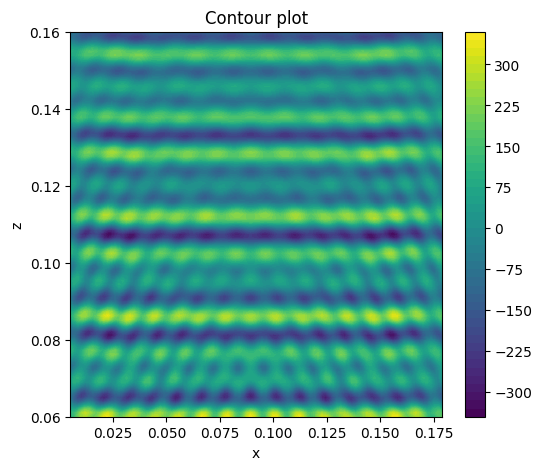

In [ ]:
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Z, np.real(FIELD), levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Contour plot")
plt.show()